# CoronaVirus Analysis and Forecasting using Data Science

Data Source: Johns Hopkins CSSE Data Repository - aggregated from multiple sources.  
https://github.com/CSSEGISandData/COVID-19

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Get the Datasets

Live data is stored in files named MM-DD-YYYY.csv, so get the current date for live data updates.  
Check the repo to see if current day's data is available yet.  If not, manually override the day.  
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [2]:
# Create the filename to load based on today's date

day = str(pd.datetime.now().day) if pd.datetime.now().day >= 10 else "0" + str(pd.datetime.now().day)
month = str(pd.datetime.now().month) if pd.datetime.now().month >= 10 else "0" + str(pd.datetime.now().month)
year = str(pd.datetime.now().year)

date = month + "-" + day + "-" + year
date

'03-23-2020'

In [3]:
#  First try to pull today's data, but if it's not available yet, pull yesterday's data

try:
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + date + ".csv"
    livedata = pd.read_csv(fileURL)
except:
    day = str(pd.datetime.now().day - 1)
    date = month + "-" + day + "-" + year
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + date + ".csv"
    livedata = pd.read_csv(fileURL)
    
date

'03-23-2020'

In [4]:
# Check out the first 5 rows to make sure the data loaded correctly

livedata.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-23 23:19:34,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-23 23:19:34,30.295065,-92.414197,1,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-23 23:19:34,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-23 23:19:34,43.452658,-116.241552,13,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-23 23:19:34,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


**Also pull the historic time series data.  Note that it won't have live data from today.**

In [5]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [6]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
# deaths.head()   # Uncomment this to check first 5 rows of data

In [7]:
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
# recovered.head()   # Uncomment this to check first 5 rows of data

## Start examining the data - Exploratory Data Analysis (EDA)

In [8]:
# Total Global confirmed cases
livedata['Confirmed'].sum()

378287

In [9]:
# Total Global deaths
livedata['Deaths'].sum()

16497

In [10]:
# Total US confirmed cases
livedata[livedata["Country_Region"]=='US']['Confirmed'].sum()

43667

In [11]:
# Total US Deaths
livedata[livedata["Country_Region"]=='US']['Deaths'].sum()

552

In [12]:
# Make a Pivot Table to summarize the confirmed cases by Country
date_columns = confirmed.iloc[:, 4:].columns
confirmed_country = pd.pivot_table(confirmed, index=['Country/Region'], values=date_columns, aggfunc=np.sum)
confirmed_country = confirmed_country.transpose()
confirmed_country.index = pd.to_datetime(confirmed_country.index)
confirmed_country = confirmed_country.sort_index()

In [13]:
# Top 20 by confirmed count as of latest date
top_20_C = confirmed_country.loc[date].sort_values(ascending=False).nlargest(20)
top_20_C

Country/Region
China             81439.0
Italy             59138.0
US                33276.0
Spain             28768.0
Germany           24873.0
Iran              21638.0
France            16044.0
Korea, South       8897.0
Switzerland        7245.0
United Kingdom     5741.0
Netherlands        4216.0
Belgium            3401.0
Austria            3244.0
Norway             2383.0
Sweden             1934.0
Portugal           1600.0
Brazil             1593.0
Denmark            1514.0
Canada             1470.0
Australia          1314.0
Name: 2020-03-23 00:00:00, dtype: float64

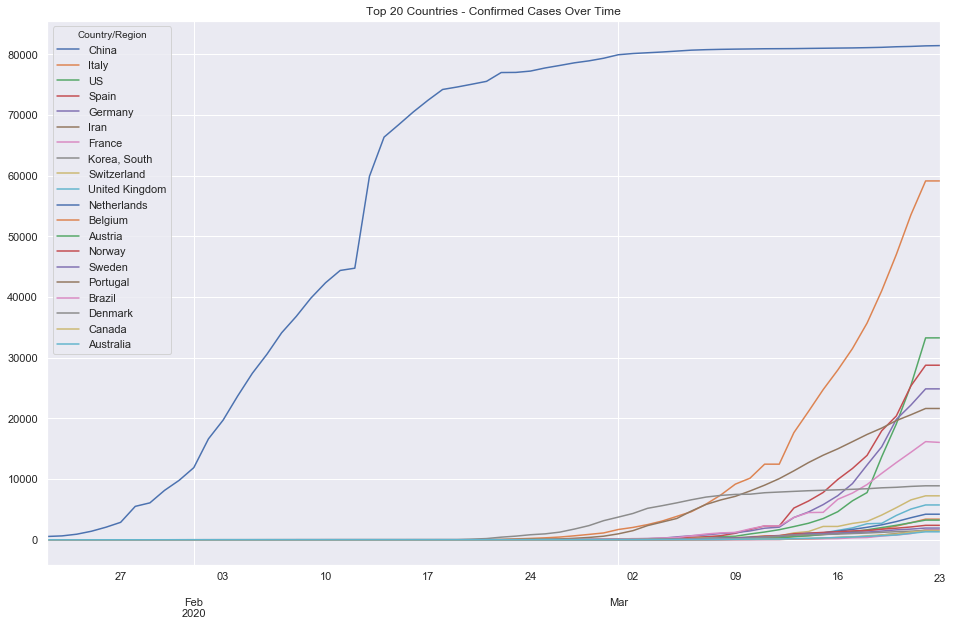

In [14]:
# Plot the top 20 countries confirmed infections over time
confirmed_country[top_20_C.index].plot(figsize=(16,10), title="Top 20 Countries - Confirmed Cases Over Time")

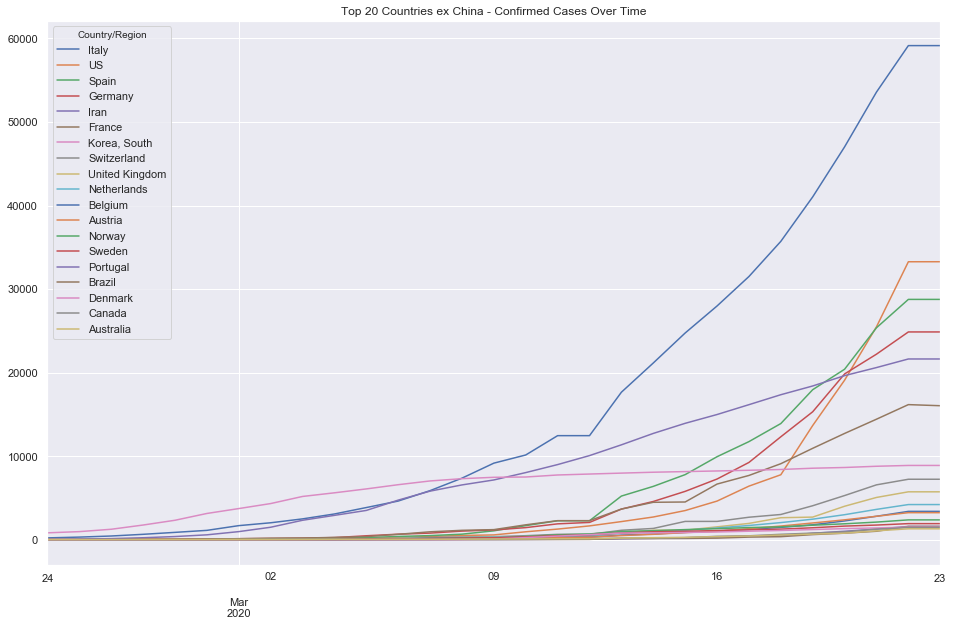

In [15]:
# Same chart but excluding China and starting on 2/24 to zoom in
confirmed_country[top_20_C.index].loc['02/24/2020':, top_20_C.index != 'China'].plot(figsize=(16,10), title="Top 20 Countries ex China - Confirmed Cases Over Time")

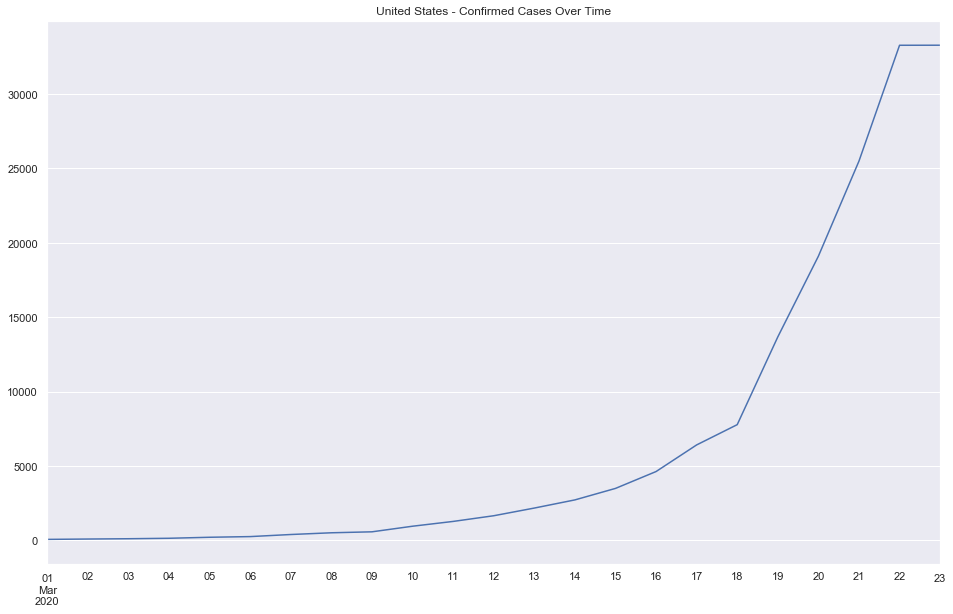

In [16]:
# Same chart but US only and starting on 3/1 to zoom in
confirmed_country[top_20_C.index].loc['3/1/2020':, 'US'].plot(figsize=(16,10), title="United States - Confirmed Cases Over Time")

In [17]:
# Create a pivot table for US States similar to the one for Countries

confirmed_US_states = pd.pivot_table(confirmed[confirmed['Country/Region']=='US'], index=['Province/State'], values=date_columns, aggfunc=np.sum)
confirmed_US_states.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Province/State,,,,,,,,,,,,,,,,,,,,,
"Adams, IN",0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
Alabama,0,0,0,0,0,0,0,0,0,0,...,131,138,138.0,0,0,0,0,0,0,0
"Alachua, FL",0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
"Alameda County, CA",0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1,1,1,1,2,2,2
Alaska,0,0,0,0,0,0,0,0,0,0,...,15,21,21.0,0,0,0,0,0,0,0


**Looks like they mixed in some city and county data with state data.  Messy...  Will need to parse these out to get accurate state info**

In [18]:
confirmed_US_states.reset_index(inplace=True)

In [19]:
confirmed_US_states.rename(columns={'Province/State':'State'}, inplace=True)
confirmed_US_cities = confirmed_US_states[confirmed_US_states['State'].str.contains(', ')]
confirmed_US_cities.rename(columns={'State':'City/County'}, inplace=True)
confirmed_US_cities.head()

/Users/Brian/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,City/County,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/21/20,3/22/20,3/23/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,"Adams, IN",0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
2,"Alachua, FL",0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
3,"Alameda County, CA",0,0,0,0,0,0,0,0,0,...,0,0,0.0,1,1,1,1,2,2,2
5,"Anoka, MN",0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
6,"Arapahoe, CO",0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0


In [20]:
confirmed_US_states = confirmed_US_states[~confirmed_US_states['State'].str.contains(', ')]

In [21]:
confirmed_US_states.head()

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/21/20,3/22/20,3/23/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
1,Alabama,0,0,0,0,0,0,0,0,0,...,131,138,138.0,0,0,0,0,0,0,0
4,Alaska,0,0,0,0,0,0,0,0,0,...,15,21,21.0,0,0,0,0,0,0,0
7,Arizona,0,0,0,0,0,0,0,0,0,...,118,152,152.0,0,0,0,0,0,0,0
8,Arkansas,0,0,0,0,0,0,0,0,0,...,122,165,165.0,0,0,0,0,0,0,0
21,California,0,0,0,0,0,0,0,0,0,...,1364,1642,1642.0,0,0,0,0,0,0,0


In [22]:
# Now that the states have been isolated (aside from 4 territories and cruise ships), shift the date to the index, and convert to datetime
confirmed_US_states.set_index('State', inplace=True)
confirmed_US_states = confirmed_US_states.transpose()
confirmed_US_states.index = pd.to_datetime(confirmed_US_states.index)
confirmed_US_states.sort_index(inplace=True)

In [23]:
confirmed_US_states.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,...,US,United States Virgin Islands,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Get the top 20 states to make the chart cleaner
top_20_States = confirmed_US_states.loc[date].nlargest(20)
top_20_States

State
New York          15793.0
Washington         1996.0
New Jersey         1914.0
California         1642.0
Illinois           1049.0
Michigan           1037.0
Louisiana           837.0
Florida             830.0
Massachusetts       646.0
Texas               627.0
Georgia             600.0
Pennsylvania        509.0
Tennessee           505.0
Colorado            476.0
Wisconsin           381.0
Ohio                355.0
North Carolina      302.0
Maryland            244.0
Connecticut         223.0
Virginia            221.0
Name: 2020-03-23 00:00:00, dtype: float64

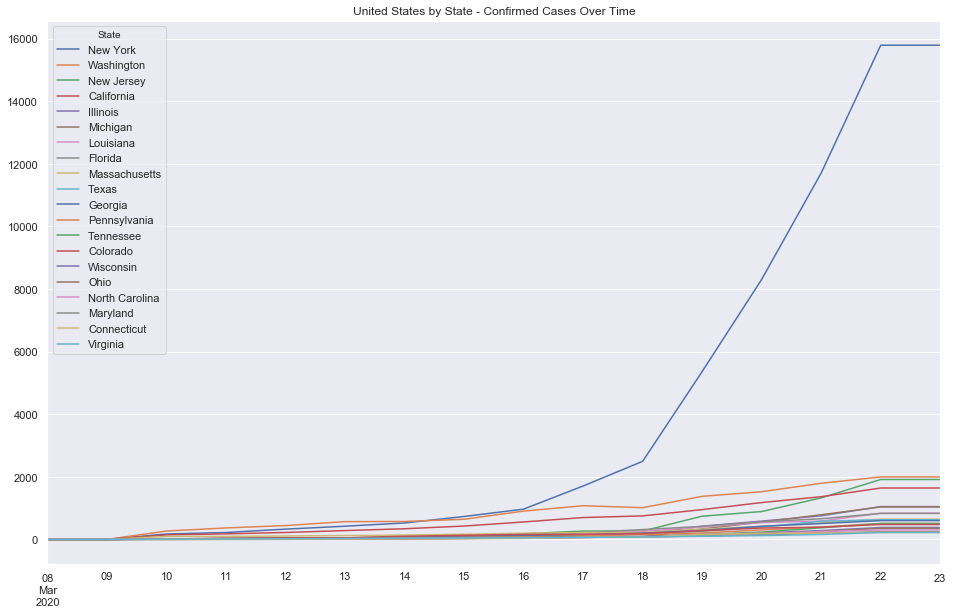

In [25]:
# Finally, the state data is in usable format to create a chart
confirmed_US_states.loc['3/8/2020':, top_20_States.index].plot(figsize=(16,10), title="United States by State - Confirmed Cases Over Time")

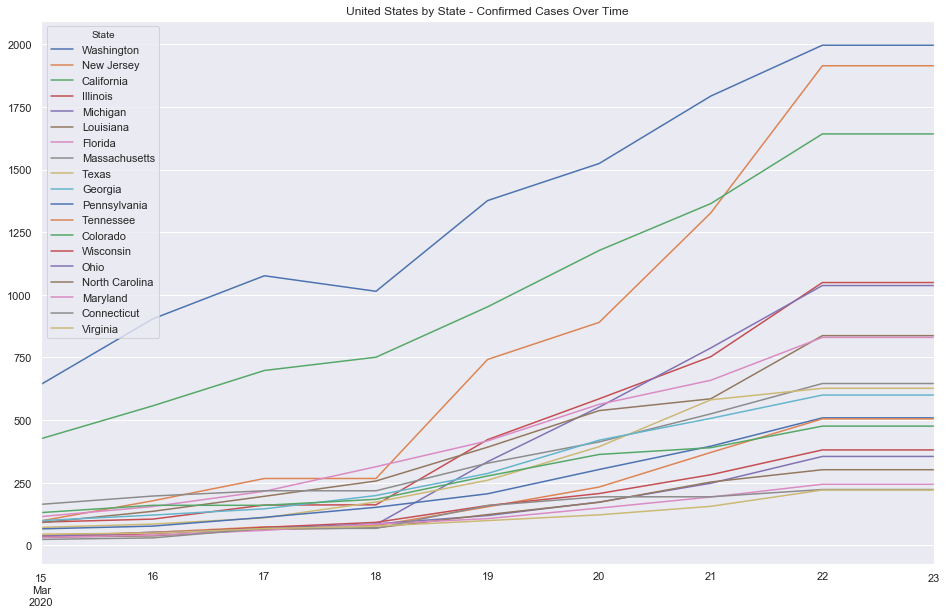

In [26]:
# Same chart but excluding New York and zoomed in since 3/15
confirmed_US_states[top_20_States.index].loc['3/15/2020':, top_20_States.index != 'New York'].plot(figsize=(16,10), title="United States by State - Confirmed Cases Over Time")

In [27]:
livedata[livedata["Country_Region"]=='US'].sort_values('Confirmed', ascending=False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2067,36061.0,New York City,New York,US,2020-03-23 23:19:34,40.767273,-73.971526,12305,99,0,0,"New York City, New York, US"
3052,36119.0,Westchester,New York,US,2020-03-23 23:19:34,41.162784,-73.757417,2894,0,0,0,"Westchester, New York, US"
2046,36059.0,Nassau,New York,US,2020-03-23 23:19:34,40.740665,-73.589419,2442,4,0,0,"Nassau, New York, US"
2721,36103.0,Suffolk,New York,US,2020-03-23 23:19:34,40.883201,-72.801217,1458,13,0,0,"Suffolk, New York, US"
1506,53033.0,King,Washington,US,2020-03-23 23:19:34,47.491379,-121.834613,1170,87,0,0,"King, Washington, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
1857,54047.0,McDowell,West Virginia,US,2020-03-23 23:19:34,37.380029,-81.650837,0,0,0,0,"McDowell, West Virginia, US"
1856,37111.0,McDowell,North Carolina,US,2020-03-23 23:19:34,35.677362,-82.048243,0,0,0,0,"McDowell, North Carolina, US"
1855,17109.0,McDonough,Illinois,US,2020-03-23 23:19:34,40.456747,-90.677755,0,0,0,0,"McDonough, Illinois, US"
1854,29119.0,McDonald,Missouri,US,2020-03-23 23:19:34,36.628696,-94.348672,0,0,0,0,"McDonald, Missouri, US"


In [28]:
livedata[livedata["Province_State"]=='California']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
25,6001.0,Alameda,California,US,2020-03-23 23:19:34,37.646294,-121.892927,118,1,0,0,"Alameda, California, US"
53,6003.0,Alpine,California,US,2020-03-23 23:19:34,38.596786,-119.822359,0,0,0,0,"Alpine, California, US"
54,6005.0,Amador,California,US,2020-03-23 23:19:34,38.445831,-120.656960,1,0,0,0,"Amador, California, US"
330,6007.0,Butte,California,US,2020-03-23 23:19:34,39.667278,-121.600525,2,0,0,0,"Butte, California, US"
339,6009.0,Calaveras,California,US,2020-03-23 23:19:34,38.205371,-120.552913,2,0,0,0,"Calaveras, California, US"
615,6011.0,Colusa,California,US,2020-03-23 23:19:34,39.178820,-122.233173,0,0,0,0,"Colusa, California, US"
624,6013.0,Contra Costa,California,US,2020-03-23 23:19:34,37.919235,-121.928953,71,1,0,0,"Contra Costa, California, US"
756,6015.0,Del Norte,California,US,2020-03-23 23:19:34,41.742283,-123.897406,0,0,0,0,"Del Norte, California, US"
858,6017.0,El Dorado,California,US,2020-03-23 23:19:34,38.779660,-120.523317,2,0,0,0,"El Dorado, California, US"
991,6019.0,Fresno,California,US,2020-03-23 23:19:34,36.757339,-119.646695,6,0,0,0,"Fresno, California, US"


In [29]:
livedata[livedata["Province_State"]=='Massachusetts']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
134,25001.0,Barnstable,Massachusetts,US,2020-03-23 23:19:34,41.729806,-70.288543,30,0,0,0,"Barnstable, Massachusetts, US"
194,25003.0,Berkshire,Massachusetts,US,2020-03-23 23:19:34,42.374284,-73.205248,26,0,0,0,"Berkshire, Massachusetts, US"
271,25005.0,Bristol,Massachusetts,US,2020-03-23 23:19:34,41.792284,-71.108722,25,0,0,0,"Bristol, Massachusetts, US"
824,25007.0,Dukes,Massachusetts,US,2020-03-23 23:19:34,41.406747,-70.687635,0,0,0,0,"Dukes, Massachusetts, US"
825,NaN,Dukes and Nantucket,Massachusetts,US,2020-03-23 23:19:34,41.406747,-70.687635,1,0,0,0,"Dukes and Nantucket,Massachusetts,US"
888,25009.0,Essex,Massachusetts,US,2020-03-23 23:19:34,42.668763,-70.946872,73,0,0,0,"Essex, Massachusetts, US"
968,25011.0,Franklin,Massachusetts,US,2020-03-23 23:19:34,42.581197,-72.586025,6,0,0,0,"Franklin, Massachusetts, US"
1171,25013.0,Hampden,Massachusetts,US,2020-03-23 23:19:34,42.134404,-72.632356,15,0,0,0,"Hampden, Massachusetts, US"
1172,25015.0,Hampshire,Massachusetts,US,2020-03-23 23:19:34,42.339980,-72.658985,6,0,0,0,"Hampshire, Massachusetts, US"
1916,25017.0,Middlesex,Massachusetts,US,2020-03-23 23:19:34,42.486077,-71.390492,232,1,0,0,"Middlesex, Massachusetts, US"


**TODO NEXT:**  
- Look into this alternative Dataset that claims to improve on JHU formatting.  https://github.com/open-covid-19/data
- More EDA and Data Viz
- Aggregate time series data into Pivot Tables, consolidate confirmed, deaths, recovered, active into one multi-level index dataFrame
- Perform forecasting using the historic time series data
- Get population data for each country / state and add to this report (may be easiest to just put in a csv file)
  - Also population density if possible
- Add metrics based on poulation data (% of population infected, etc)
- Model out different scenarios: 
  - No changes
  - Lockdown
  - Extensive testing
  - Mandatory quarantines
  - Containment effectiveness score for each country (estimated)
  - Cure discovered
- Look into using Unity to model out scenarios, using simulated humans and the Global / US map tool I have